In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sym
import math

%matplotlib inline

In [2]:
#理想単一光子源

In [3]:
def entropy(p): #p.10 Shannon エントロピー
    result = -p*np.log2(p)-(1-p)*np.log2(1-p)
    return result

e_dA=e_dB=0.005 #p.16 figure6
e_d=e_dA+e_dB
e_0=0.5 #p.18 appendix A
tau_p=tau_w=300*pow(10,-12) #τタウ
Rs=1/tau_w

eta_d=0.93 #figure6
eta_ent=0.05  #ηentイータ
eta_QM=eta_ent*pow(eta_d,2)

Latt=22 #22kmでe^-1の損失(eta1(22))

"""def eta_herld(L): #間接的ヘラルドの場合
    result=eta_QM*np.exp((L/2)/Latt)
    return result"""

def eta(L): #appendixBのやつ
    result=np.exp(-L/Latt)*eta_d
    return result

gamma_dc=1 #p.16 figure6 γdc 各検出器のダークカウントレート

p_dc=gamma_dc*tau_p

def Y1(L): #p.18 appendix A
    result =1-(1-eta(L))*pow((1-p_dc),2)
    return result

def e_1(L): #p.18 appendix A
    result=(e_0*Y1(L)-(e_0-e_d)*eta(L)*(1-p_dc))/Y1(L)
    return result
    
f=1.16 #p.13

In [4]:
def R_BB84(L): #p.18 appendix A
    result=Rs*Y1(L)*(1-entropy(e_1(L))-f*entropy(e_1(L)))
    return result

In [13]:
L = np.arange(0, 500)

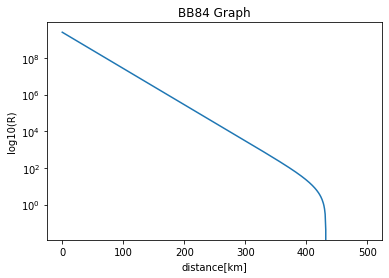

In [14]:
#グラフタイトル
plt.title('BB84 Graph')

#グラフの範囲
#plt.xlim(0, 500)
#plt.ylim(0, 0.5)

#グラフの軸
plt.xlabel('distance[km]')
plt.ylabel('log10(R)')
plt.yscale('log')

#グラフ表示
plt.plot(L,R_BB84(L))

In [15]:
#BB84のデコイ法

In [16]:
myu=0.5 #μ

def Q1(L): #p.18 appendix A
    result=Y1(L)*myu*np.exp(-myu)
    return result

def Q_myu(L): #p.18 appendix A
    result=1-np.exp(-eta(L)*myu)*pow(1-p_dc,2)
    return result

def E_myu(L): #p.18 appendix A
    result=(e_0*Q_myu(L)-(e_0-e_d)*(1-np.exp(-eta(L)*myu))*(1-p_dc))/Q_myu(L)
    return result

In [24]:
def R_BB84_decoy(L): #p.18 appendix A
    result=Rs*(Q1(L)*(1-entropy(e_1(L)))-f*Q_myu(L)*entropy(E_myu(L)))
    return result

In [25]:
L = np.arange(0, 500)

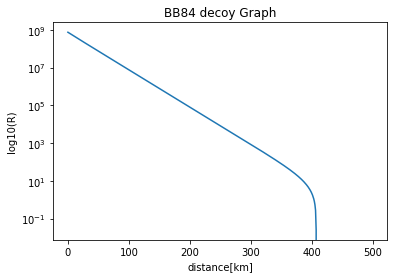

In [26]:
#グラフタイトル
plt.title('BB84 decoy Graph')

#グラフの範囲
#plt.xlim(0, 7)
#plt.ylim(0, 0.5)

#グラフの軸
plt.xlabel('distance[km]')
plt.ylabel('log10(R)')
plt.yscale('log')

#グラフ表示
plt.plot(L,R_BB84_decoy(L))

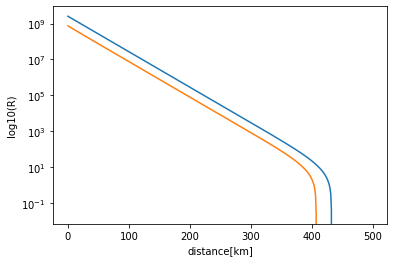

In [27]:
plt.xlabel('distance[km]')
plt.ylabel('log10(R)')
plt.yscale('log')
plt.plot(L,R_BB84(L))
plt.plot(L,R_BB84_decoy(L))